# ![Análisis y Visualización de Datos del Balón de Oro 2024](https://images-eu.ssl-images-amazon.com/images/G/02/UCLUK_HH_Generic/UCL_IT_HelpHubBanner_WebHeroBanner_Merch_3000x600_PV_it-IT_1.jpg)

## Análisis y Visualización de Datos del Balón de Oro 2024

Este proyecto tiene como objetivo realizar un análisis exhaustivo de un conjunto de datos relacionados con los nominados y las estadísticas de los jugadores para el Balón de Oro 2024.

El proceso comienza con la limpieza y transformación de los datos para asegurar su calidad y consistencia, abordando aspectos como la eliminación de datos faltantes y la corrección de errores.

Posteriormente, se llevarán a cabo una serie de análisis y visualizaciones para extraer información relevante sobre los jugadores, como su edad, nacionalidad, posición, y estadísticas de rendimiento, incluyendo goles, minutos jugados y partidos como titular.

El objetivo final es obtener conclusiones útiles que proporcionen una visión detallada de las tendencias y preferencias en el fútbol actual, así como destacar a los jugadores que han tenido un impacto significativo en sus respectivas ligas y equipos.

---
#### 1. Carga, modificacion y creación de nuevo CSV con datos de interes
---

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = './data/2024 Ballon Dor Nominees League Stats.csv'

df = pd.read_csv(filepath)

In [221]:
# Renombramos algunas columnas que son de interes

df = df.rename(
    columns={
        "pos": "position",
        "Playing Time-MP": "matches played",
        "Playing Time-Min": "minutes played",
        "Playing Time-Starts": "starting matches",
        "Performance-Gls": "goals",
    }
)

In [222]:
# Creamos un nuevo DataFrame con las columnas que nos interesan

df = df[
    [
        "player",
        "age",
        "born",
        "position",
        "nation",
        "league",
        "team",
        "matches played",
        "minutes played",
        "starting matches",
        "goals",
    ]
]

# Reseteamos los índexs
df.reset_index(drop=True, inplace=True)

# Guardar el nuevo dataframe en un csv
df.to_csv('./data/cleaned_data.csv', index=False)

---
#### 2. Carga del CSV definitivo y analisis inicial
---

In [223]:
filepath = './data/cleaned_data.csv'

clean_df = pd.read_csv('./data/cleaned_data.csv')

In [224]:
# Mostramos la estructura de los datos

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player            30 non-null     object
 1   age               30 non-null     int64 
 2   born              30 non-null     int64 
 3   position          30 non-null     object
 4   nation            30 non-null     object
 5   league            30 non-null     object
 6   team              30 non-null     object
 7   matches played    30 non-null     int64 
 8   minutes played    30 non-null     int64 
 9   starting matches  30 non-null     int64 
 10  goals             30 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 2.7+ KB


In [225]:
# Mostramos si existen o no datos nulos en cada columna

clean_df.isnull().sum()

player              0
age                 0
born                0
position            0
nation              0
league              0
team                0
matches played      0
minutes played      0
starting matches    0
goals               0
dtype: int64

In [226]:
# Mostramos un resumen de los datos

clean_df.head()

,player,age,born,position,nation,league,team,matches played,minutes played,starting matches,goals
0,Bukayo Saka,21,2001,FW,ENG,ENG-Premier League,Arsenal,35,2919,35,16
1,Declan Rice,24,1999,MF,ENG,ENG-Premier League,Arsenal,38,3225,37,7
2,Martin Ødegaard,24,1998,MF,NOR,ENG-Premier League,Arsenal,35,3091,35,8
3,William Saliba,22,2001,DF,FRA,ENG-Premier League,Arsenal,38,3420,38,2
4,Emiliano Martínez,30,1992,GK,ARG,ENG-Premier League,Aston Villa,34,3015,34,0


---
#### 3. Filtrado de datos
---

In [227]:
# Filtrado de los jugadores que tienen menos de 23 años.

clean_df[clean_df["age"] < 23][['player', 'age']]

,player,age
0,Bukayo Saka,21
3,William Saliba,22
6,Nico Williams,21
7,Lamine Yamal,16
9,Cole Palmer,21
14,Florian Wirtz,20
27,Jude Bellingham,20


In [228]:
# Filtrado de los jugadores que han jugado más de 30 partidos.

clean_df[clean_df["matches played"] > 30][["player", "matches played"]]

,player,matches played
0,Bukayo Saka,35
1,Declan Rice,38
2,Martin Ødegaard,35
3,William Saliba,38
4,Emiliano Martínez,34
5,Ademola Lookman,31
6,Nico Williams,31
7,Lamine Yamal,37
8,Harry Kane,32
9,Cole Palmer,33


In [229]:
# Filtrado de los jugadores que tienen más de 25 años y juega en la "ENG-Premier League".

clean_df[(clean_df["age"] > 25) & (clean_df["league"] == "ENG-Premier League")][['player', 'age', 'league']]

,player,age,league
4,Emiliano Martínez,30,ENG-Premier League
19,Rodri,27,ENG-Premier League
20,Rúben Dias,26,ENG-Premier League


In [230]:
# Filtrado de los jugadores que han anotado más de 20 goles y han jugado más de 30 partidos.

clean_df[(clean_df["goals"] > 20) & (clean_df["matches played"] > 30)][
    ["player", "goals", "matches played"]
]

,player,goals,matches played
8,Harry Kane,36,32
9,Cole Palmer,22,33
11,Artem Dovbyk,24,36
13,Lautaro Martínez,24,33
17,Erling Haaland,27,31


In [231]:
# Filtrado de los jugadores que son delanteros (FW) de nacionalidad inglesa (ENG)

clean_df[(clean_df['position'] == 'FW') & (clean_df['nation'] == 'ENG')][['player', 'position', 'nation']]

,player,position,nation
0,Bukayo Saka,FW,ENG
8,Harry Kane,FW,ENG


In [232]:
# Filtrado de los jugadores que pertenecen a "Arsenal" y muestra solo las columnas "player", "position", "goals" y "team"

clean_df[clean_df['team'] == 'Arsenal'][['player', 'position', 'goals', 'team']]

,player,position,goals,team
0,Bukayo Saka,FW,16,Arsenal
1,Declan Rice,MF,7,Arsenal
2,Martin Ødegaard,MF,8,Arsenal
3,William Saliba,DF,2,Arsenal


In [233]:
# Filtrado de los jugadores que han jugado más de 30 partidos y ordenamiento por "minutes played" en orden descendente.

clean_df[clean_df["matches played"] > 30][["player", "minutes played"]].sort_values(
    "minutes played", ascending=False
)

,player,minutes played
3,William Saliba,3420
1,Declan Rice,3225
2,Martin Ødegaard,3091
4,Emiliano Martínez,3015
19,Rodri,2931
0,Bukayo Saka,2919
26,Federico Valverde,2904
18,Phil Foden,2857
8,Harry Kane,2839
15,Granit Xhaka,2821


---
#### 3. Visualización de datos
---

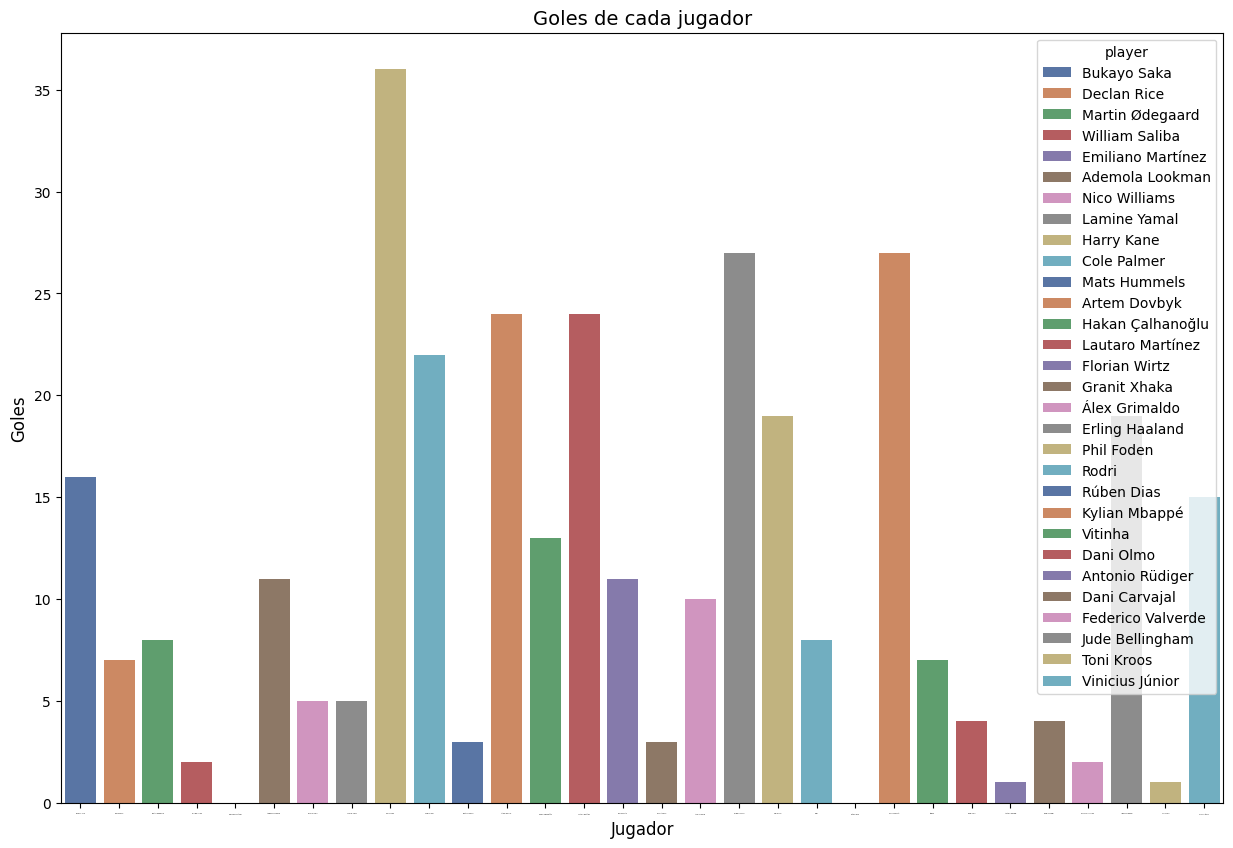

In [234]:
# Visualización de los goles de cada jugador

plt.figure(figsize=(15, 10))

sns.barplot(
  x="player",
  y="goals",
  hue="player",
  data=clean_df,
  palette="deep",
  legend=True
)

plt.title('Goles de cada jugador', fontsize=14)
plt.xlabel('Jugador', fontsize=12)
plt.xticks(fontsize=0)
plt.ylabel('Goles', fontsize=12)

plt.show()

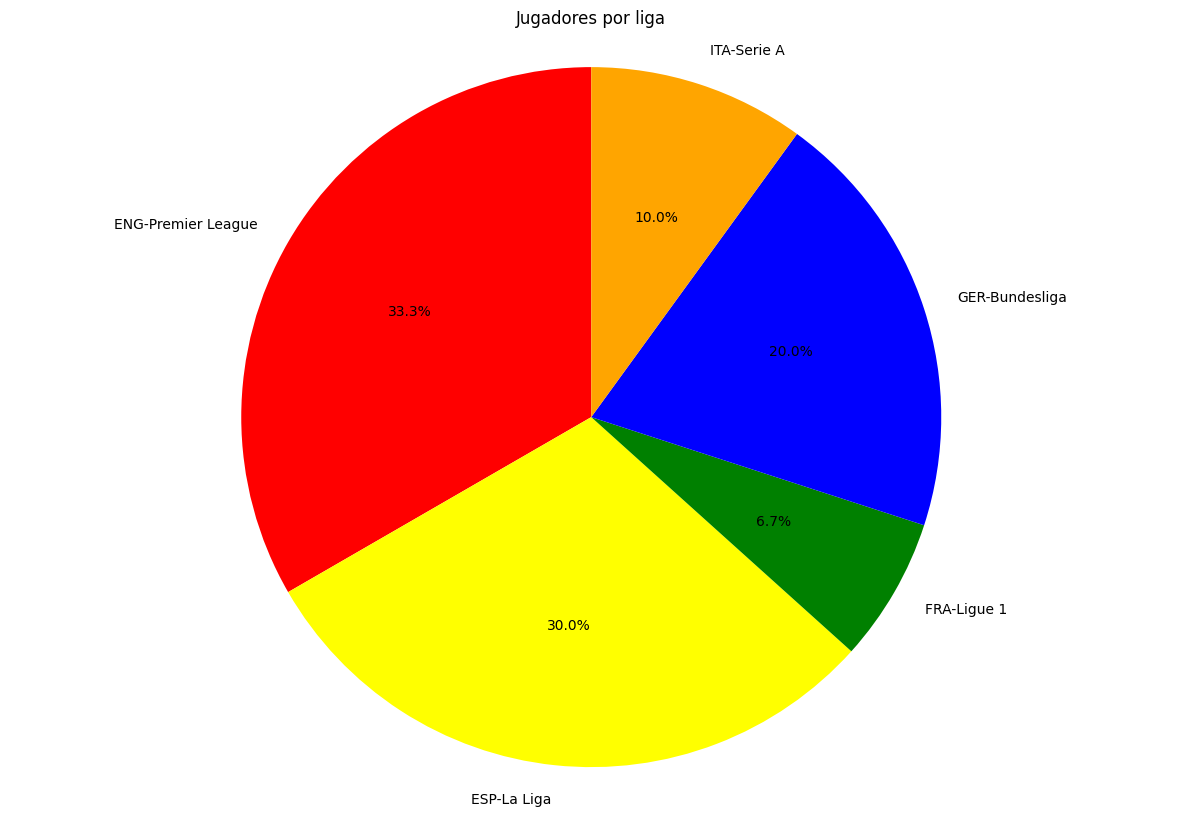

In [235]:
# Visualización de la cantidad de jugadores agrupados por liga

df_leagues = clean_df.groupby('league')['player'].count().reset_index()

plt.figure(figsize=(15, 10))

plt.pie(
    df_leagues["player"],
    labels=df_leagues["league"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["red", "yellow", "green", "blue", "orange"],
)

plt.title('Jugadores por liga')

plt.axis('equal')

plt.show()

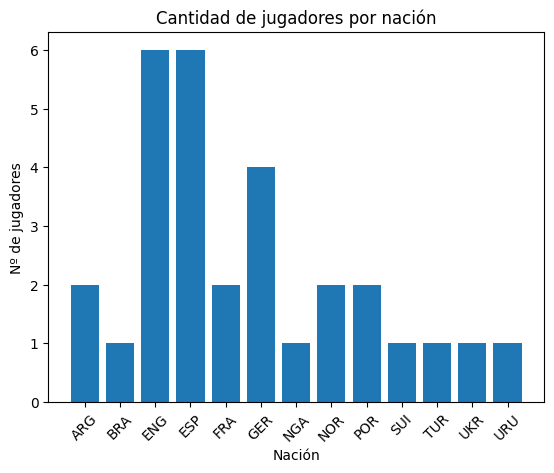

In [236]:
# Visualizacion de la cantidad de jugadores por nación

df_countries = clean_df.groupby("nation")['player'].count().reset_index()

plt.bar(df_countries["nation"], df_countries["player"])

plt.xlabel('Nación')
plt.ylabel('Nº de jugadores')
plt.title('Cantidad de jugadores por nación')
plt.xticks(rotation=45)

plt.show()

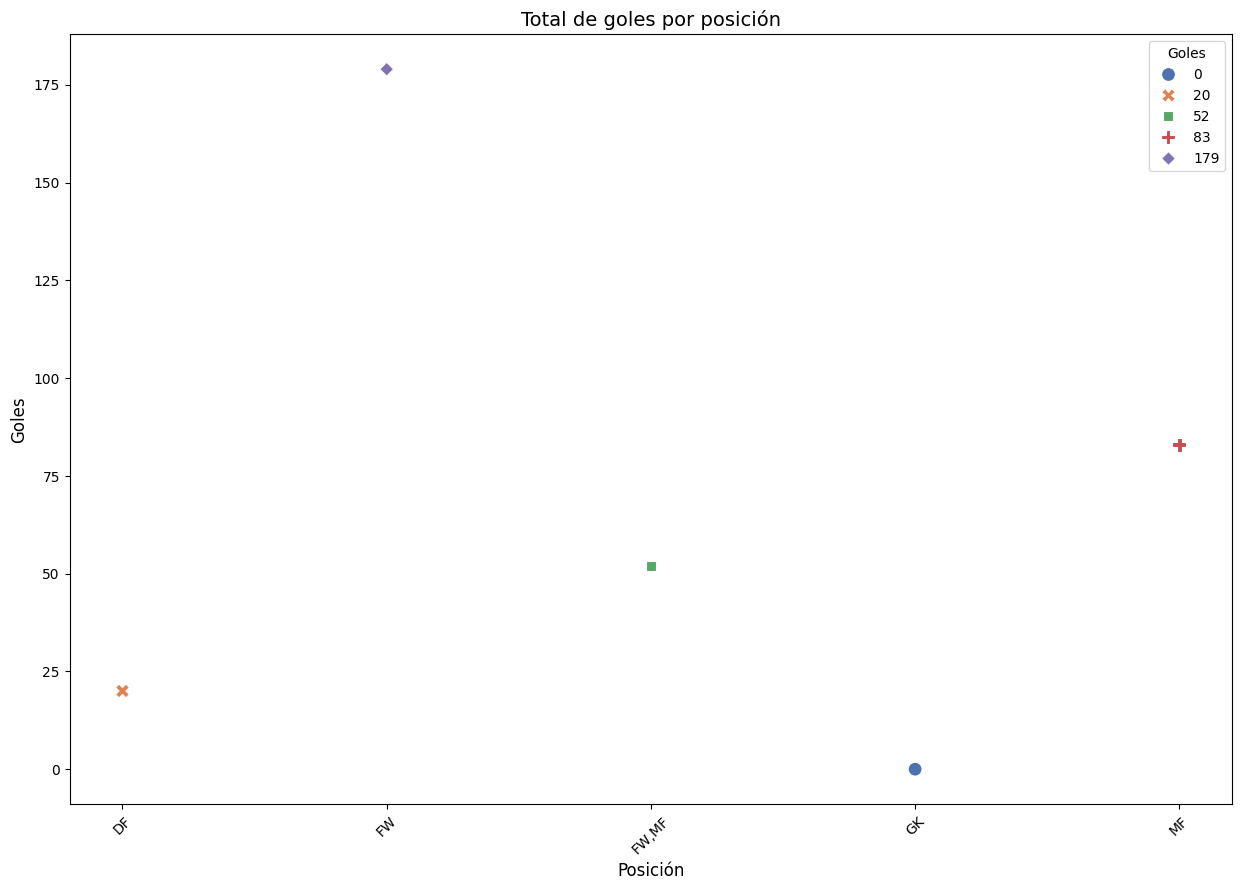

In [237]:
# Visualización del total de goles por posición de los jugadores

df_goals = clean_df.groupby('position')['goals'].sum().reset_index()

plt.figure(figsize=(15, 10))

sns.scatterplot(
    x=df_goals["position"],
    y=df_goals["goals"],
    hue=df_goals["goals"],
    style=df_goals["goals"],
    data=df_goals,
    palette="deep",
    s=100,
)

plt.title('Total de goles por posición', fontsize=14)
plt.xlabel('Posición', fontsize=12)
plt.ylabel("Goles", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Goles')

plt.show()